# Configuration

In [70]:
config = {
    "start_date_train": "1970-01-01",
    "end_date_train": "2015-12-31",
    "start_date_test": "2016-01-01",
    "end_date_test": "2022-12-31",
    "min_variable_count": 2,
    "max_variable_count": 20,
}

In [71]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets

df = pd.read_csv("./data_concours.csv", index_col=0)

df["DATE"] = pd.to_datetime(df["DATE"])
df = df.set_index("DATE").asfreq("B")  # B: business day frequency, # QE: Quarter end, ME: month end frequency

df.head()

,US_CPI,US_CPI_EXCL_FOOD_N_ENERGY,US_PERSONAL_SPENDING_PCE,CANADA_CPI,CANADA_CPI_EXCL_FOOD_N_ENERGY,US_CPI_MOM,US_CPI_QOQ,US_CPI_YOY,US_CPI_EXCL_FOOD_N_ENERGY_MOM,US_CPI_EXCL_FOOD_N_ENERGY_QOQ,...,US_VIX_INDEX_QOQ,US_VIX_INDEX_YOY,DXY_INDEX_WOW,DXY_INDEX_MOM,DXY_INDEX_QOQ,DXY_INDEX_YOY,SKEW_INDEX_WOW,SKEW_INDEX_MOM,SKEW_INDEX_QOQ,SKEW_INDEX_YOY
DATE,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
pd.set_option("display.max_colwidth", None)


def load_data_dict():
    tables = []
    with open("data_concours_feature_descriptions.txt") as dd:
        dd_json = json.load(dd)
        for k in dd_json.keys():
            tables.append(pd.json_normalize(dd_json[k]))

    data_dictionary = pd.concat(tables).reset_index(drop=True)
    return data_dictionary


data_dictionary = load_data_dict()

In [73]:
len(df.columns)

219

In [74]:
data_dictionary.loc[data_dictionary["FEATURE_CATEGORY"] == "RATE"]

,FEATURE_NAME,FEATURE_CATEGORY,FEATURE_DESCRIPTION
37,RATE_LEVEL_10Y,RATE,"Yield on 10-year US government bonds, representing long-term interest rates."
38,RATE_LEVEL_1Y,RATE,"Yield on 1-year US government bonds, representing short-term interest rates."
39,RATE_LEVEL_2Y,RATE,"Yield on 2-year US government bonds, representing short-term interest rates."
40,RATE_LEVEL_3M,RATE,"Yield on 3-month US government bonds, representing very short-term interest rates."
41,RATE_LEVEL_3Y,RATE,"Yield on 3-year US government bonds, representing medium-term interest rates."
42,RATE_LEVEL_5Y,RATE,"Yield on 5-year US government bonds, representing medium-term interest rates."
43,CAN_TB_YIELD_1YR,RATE,"Yield on 1-year Canadian Treasury Bills, representing short-term interest rates in Canada."
44,CAN_TB_YIELD_3MTH,RATE,"Yield on 3-month Canadian Treasury Bills, representing very short-term interest rates in Canada."
45,CAN_TB_YIELD_6MTH,RATE,"Yield on 6-month Canadian Treasury Bills, representing short-term interest rates in Canada."
46,FFED,RATE,"Federal Funds Rate, the interest rate at which depository institutions trade federal funds with each other overnight."


In [75]:
def get_feature_desc(feature: str):
    feature_clean = feature.replace("_YOY", "").replace("_QOQ", "").replace("_MOM", "").replace("_WOW", "")
    feature_clean = re.sub(r"_\d{1,2}(?:YRS|MTHS|YR)", "", feature_clean)
    desc = data_dictionary.loc[data_dictionary["FEATURE_NAME"] == feature_clean]
    if desc.empty:
        raise Exception(f"Feature {feature} not found in data dictionary")
    return desc.iloc[0]["FEATURE_DESCRIPTION"]

def print_features_not_in_data_dict(df, data_dict):
    for feature in df.columns:
        try:
            get_feature_desc(feature)
        except:
            print(f"Feature {feature} not found in data dictionary")


print_features_not_in_data_dict(df, data_dictionary)

Feature US_TB_YIELD_10YRS not found in data dictionary
Feature US_TB_YIELD_1YR not found in data dictionary
Feature US_TB_YIELD_2YRS not found in data dictionary
Feature US_TB_YIELD_3MTHS not found in data dictionary
Feature US_TB_YIELD_3YRS not found in data dictionary
Feature US_TB_YIELD_5YRS not found in data dictionary
Feature CAN_TB_YIELD_1YR not found in data dictionary
Feature CAN_TB_YIELD_1YR_WOW not found in data dictionary
Feature CAN_TB_YIELD_1YR_MOM not found in data dictionary
Feature CAN_TB_YIELD_1YR_QOQ not found in data dictionary
Feature CAN_TB_YIELD_1YR_YOY not found in data dictionary


# EDA

In [76]:
# Make plots of all features and tile them
def plot_features(change):
    feature = change['new']
    try:
        desc = get_feature_desc(feature)
    except:
        return
    fig = px.line(df, x=df.index, y=feature, title=feature + " " + desc)
    fig.update_layout(title={'font': {'size': 10}})
    fig.show()


dropdown = widgets.Dropdown(
    options=list(df.columns),
    description="Feature",
    value=str(df.columns[0]),
)

display(dropdown)
dropdown.observe(plot_features, names='value')


Dropdown(description='Feature', options=('US_CPI', 'US_CPI_EXCL_FOOD_N_ENERGY', 'US_PERSONAL_SPENDING_PCE', 'C…

In [77]:
data_dictionary.loc[data_dictionary["FEATURE_NAME"].str.contains("RATE_LEVEL")]

,FEATURE_NAME,FEATURE_CATEGORY,FEATURE_DESCRIPTION
37,RATE_LEVEL_10Y,RATE,"Yield on 10-year US government bonds, representing long-term interest rates."
38,RATE_LEVEL_1Y,RATE,"Yield on 1-year US government bonds, representing short-term interest rates."
39,RATE_LEVEL_2Y,RATE,"Yield on 2-year US government bonds, representing short-term interest rates."
40,RATE_LEVEL_3M,RATE,"Yield on 3-month US government bonds, representing very short-term interest rates."
41,RATE_LEVEL_3Y,RATE,"Yield on 3-year US government bonds, representing medium-term interest rates."
42,RATE_LEVEL_5Y,RATE,"Yield on 5-year US government bonds, representing medium-term interest rates."


# On peut changer la fréquence des entrées

<Axes: xlabel='DATE'>

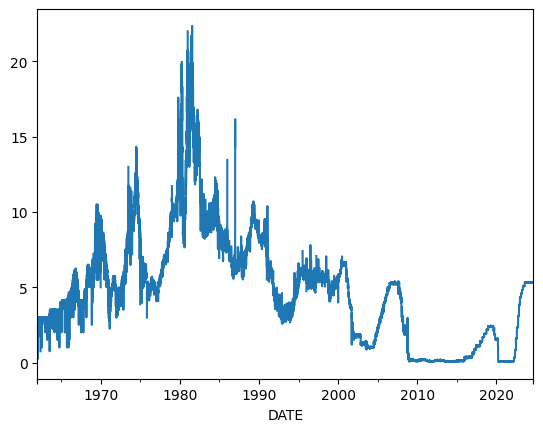

In [78]:
df["FFED"].plot()

<Axes: xlabel='DATE'>

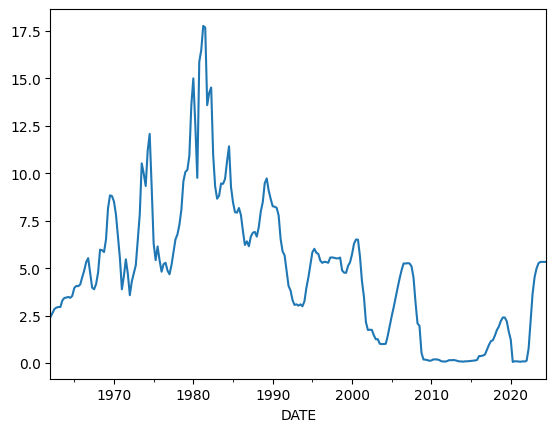

In [79]:
df = df.resample("QE").mean()
df["FFED"].plot()

# Null Value Treatment

In [80]:
df = df.ffill()
df = df.dropna(axis=1, how="all")  # Drop columns that are all NaN

# Drop columns with more than 10% NaN values
# even after forward filling
df = df.loc[:, df.isna().mean() < 0.1]

# Difference where necessary to ensure stationarity
why it's important: https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm
Ecq on différencie toutes les colonnes qui passent pas le Dickey-Fuller test, ou seulement celles qui sont pas déjà différenciée (YOY, MOM, WOW)?

In [81]:
import statsmodels.api as sm


if False: # Long à exécuter donc on sauvegarde le résultat
    variables = df.columns
    variables_to_diff = []

    # Function to apply ADF test
    def adf_test(series, title=""):
        print(f"Augmented Dickey-Fuller Test: {title}")
        result = sm.tsa.stattools.adfuller(series.dropna())

        if result[1] <= 0.05:
            print("Series is stationary.\n")
        else:
            print("Series is non-stationary.\n")

        return result[1]

    # Check stationarity and difference if necessary
    for var in variables:

        result = adf_test(df[var], title=var)

        if result > 0.05:
            variables_to_diff.append(var)
            df[f"{var}_diff"] = df[var].diff()
            df = df.drop(columns=[var])

            res2 = adf_test(df[f"{var}_diff"], title=f"{var}_diff")
            if res2 > 0.05:
                raise ValueError(f"{var} is still not stationary")

    print(variables_to_diff)

else:
    variables_to_diff = [
        "US_CPI",
        "US_CPI_EXCL_FOOD_N_ENERGY",
        "US_PERSONAL_SPENDING_PCE",
        "CANADA_CPI",
        "CANADA_CPI_EXCL_FOOD_N_ENERGY",
        "US_CPI_EXCL_FOOD_N_ENERGY_YOY",
        "CANADA_CPI_YOY",
        "CANADA_CPI_EXCL_FOOD_N_ENERGY_YOY",
        "US_M2",
        "US_CONSUMER_CREDIT",
        "US_INDUSTRIAL_PRODUCTION",
        "US_NFP_ESTABLISHMENT_DATA",
        "US_RETAIL_SALES",
        "US_EMPLOYMENT_HOUSEHOLD_DATA",
        "CANADA_MANUFACTURING_SALES",
        "CANADA_EMPLOYMENT_HOUSEHOLD_SURVEY_DATA",
        "CANADA_UNEMPLOYMENT_RATE",
        "CAN_M2",
        "TSX",
        "SNP_500",
        "US_TB_YIELD_10YRS",
        "US_TB_YIELD_1YR",
        "US_TB_YIELD_3YRS",
        "US_TB_YIELD_5YRS",
        "CAN_TB_YIELD_3MTH",
        "FFED",
        "DXY_INDEX",
    ]
    for var in variables_to_diff:
        df[f"{var}_diff"] = df[var].diff()
        if var != "FFED":
            df = df.drop(columns=[var])


# Shift response variable to the right once
## and delete covariates that are just transformations on response variables
On essaie de prédire le taux d'intérêt de demain avec les informations d'aujourd'hui

In [82]:
df["FFED_diff"] = df["FFED_diff"].shift(-1, freq="infer")

df = df.drop(columns=["FFED_WOW", "FFED_MOM", "FFED_QOQ", "FFED_YOY"])

# Train-test split

In [83]:
y_train = df.loc[config["start_date_train"]:config["end_date_train"], "FFED_diff"]
X_train = df.loc[config["start_date_train"]:config["end_date_train"]].drop(columns=["FFED_diff", "FFED"])

y_test = df.loc[config["start_date_test"]:config["end_date_test"], "FFED_diff"]
X_test = df.loc[config["start_date_test"]:config["end_date_test"]].drop(columns=["FFED_diff", "FFED"])

# Check for correlation

In [84]:
df.corr()["FFED_diff"].sort_values(ascending=False)

FFED_diff                        1.000000
US_INDUSTRIAL_PRODUCTION_MOM     0.369182
US_TB_YIELD_1YR_diff             0.364475
US_CAPACITY_UTILIZATION_MOM      0.354922
US_TB_YIELD_3YRS_diff            0.345524
                                   ...   
US_UNEMPLOYMENT_RATE_YOY        -0.179291
CANADA_UNEMPLOYMENT_RATE_diff   -0.183482
CANADA_UNEMPLOYMENT_RATE_QOQ    -0.196899
CANADA_UNEMPLOYMENT_RATE_YOY    -0.207039
CANADA_UNEMPLOYMENT_RATE_MOM    -0.291411
Name: FFED_diff, Length: 102, dtype: float64

# Model Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.model_selection import TimeSeriesSplit

model = linear_model.LinearRegression()
timeseries_crossval = TimeSeriesSplit(n_splits=5)

sfs = SequentialFeatureSelector(
    model, k_features=(1, 20), scoring="r2", forward=True, floating=True, cv=timeseries_crossval
)
selected_features = sfs.fit(X_train, y_train)

X_train = sfs.transform(X_train) #train_df.iloc[:, selected_features.k_feature_idx_]
X_test = sfs.transform(X_test)#test_df.iloc[:, selected_features.k_feature_idx_]

model.fit(X_train, y_train)

pred = model.predict(X_test)

diff = y_test - pred
mse = diff.pow(2).mean()

/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning:

`fit_params` is d

In [86]:
selected_features.subsets_

{1: {'feature_idx': (95,),
  'cv_scores': array([-0.05874842,  0.29991402,  0.35994689,  0.50179254, -0.01742744]),
  'avg_score': 0.21709551594233045,
  'feature_names': ('US_TB_YIELD_1YR_diff',)},
 2: {'feature_idx': (74, 95),
  'cv_scores': array([-0.11293125,  0.29702973,  0.3629425 ,  0.50603514,  0.14412676]),
  'avg_score': 0.2394405748730127,
  'feature_names': ('US_CPI_diff', 'US_TB_YIELD_1YR_diff')},
 3: {'feature_idx': (74, 81, 95),
  'cv_scores': array([-0.13999693,  0.30392138,  0.35381567,  0.50809635,  0.15831496]),
  'avg_score': 0.23683028610185444,
  'feature_names': ('US_CPI_diff',
   'CANADA_CPI_EXCL_FOOD_N_ENERGY_YOY_diff',
   'US_TB_YIELD_1YR_diff')},
 4: {'feature_idx': (66, 67, 74, 95),
  'cv_scores': array([-0.15659564,  0.27292024,  0.35138665,  0.51392341,  0.19912301]),
  'avg_score': 0.23615153315190823,
  'feature_names': ('CAN_TB_YIELD_3MTH_WOW',
   'CAN_TB_YIELD_3MTH_MOM',
   'US_CPI_diff',
   'US_TB_YIELD_1YR_diff')},
 5: {'feature_idx': (66, 67, 74, 81

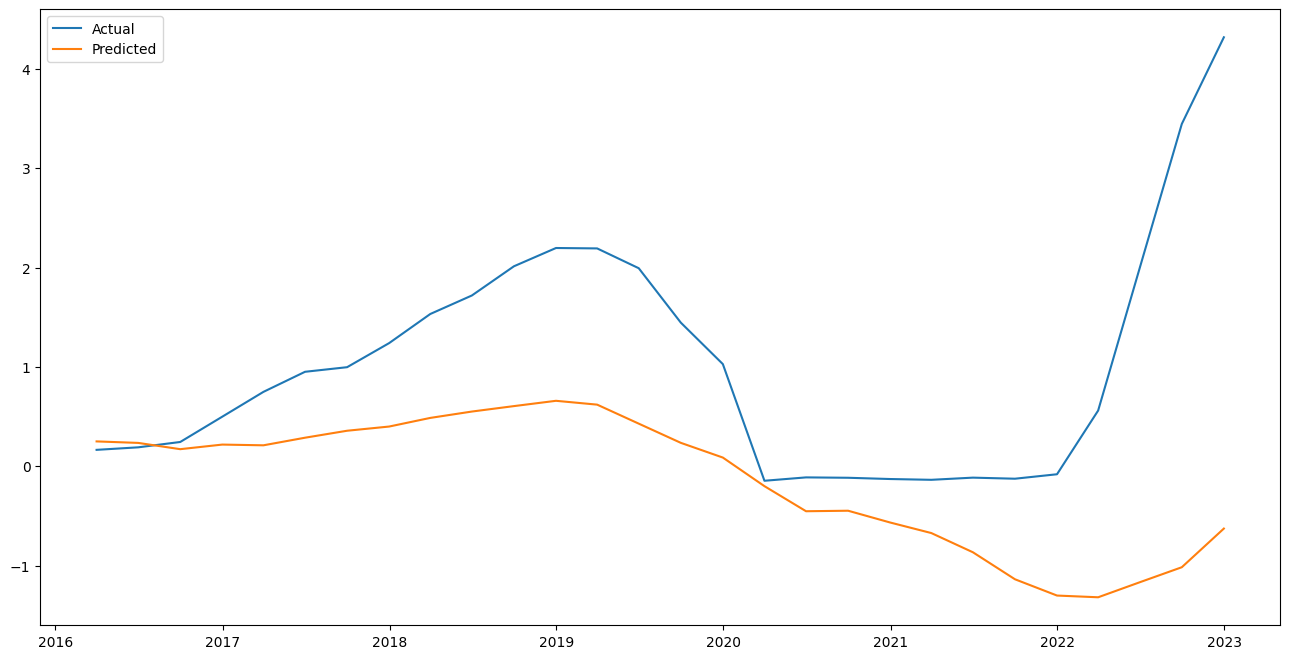

In [102]:
# Plot the results

# Restore the diff column
restored_y_test = y_test.cumsum() + df.loc[config["end_date_train"], "FFED"]
restored_pred = pd.Series(pred, index=y_test.index).cumsum() + df.loc[config["end_date_train"], "FFED"]

plt.figure(figsize=(16, 8))
plt.plot(y_test.index, restored_y_test, label="Actual")
plt.plot(y_test.index, restored_pred, label="Predicted")
plt.legend()

In [89]:
sfs.k_feature_names_

('US_CPI_diff', 'US_TB_YIELD_1YR_diff')

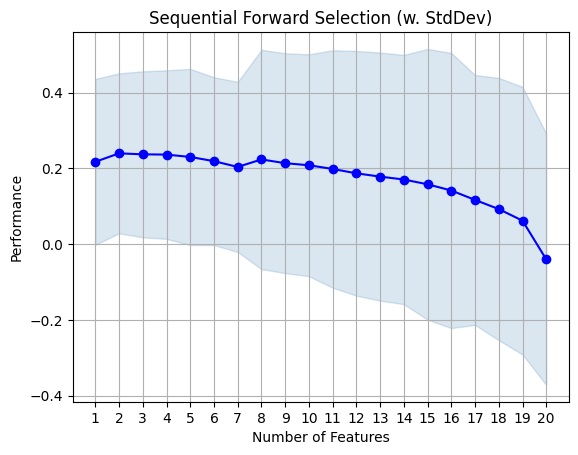

In [90]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev")

# plt.ylim([0.8, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

In [91]:
def plot_features(features: list[str]):
    features.append("FFED_diff")
    px.line(df, x=df.index, y=features).show()

In [92]:
plot_features(['US_CPI_EXCL_FOOD_N_ENERGY_diff',
   'CANADA_CPI_diff',
   'US_TB_YIELD_1YR_diff'])

In [93]:
px.line(df, x=df.index, y=["FFED_diff", ]).show()